In [1]:
import turicreate as tc

In [2]:
train_data=tc.SFrame('image_train_data')
test_data=tc.SFrame('image_test_data')

In [3]:
train_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


/home/ruthvik/venv/lib/python3.6/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

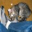
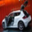
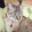
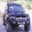
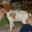
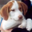
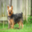
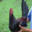
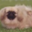
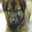
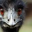
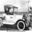
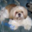
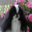
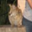
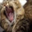
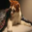
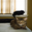
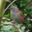
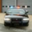
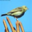
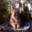
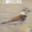
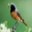
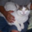
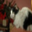
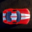
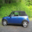
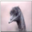
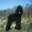
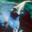
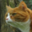
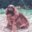
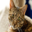
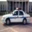
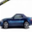
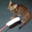
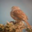
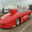
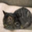
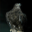
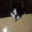
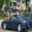
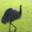
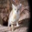
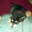
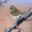
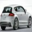
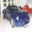
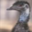
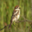
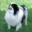
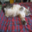
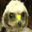
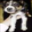
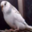
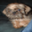
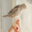
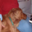
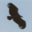
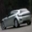
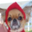
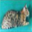
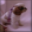
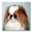
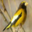
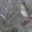
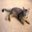
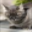
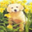
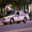
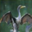
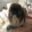
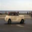
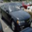
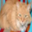
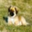
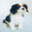
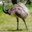
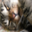
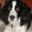
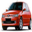
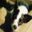
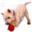
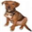
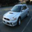
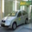
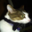
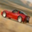
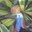
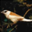
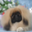
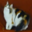
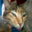
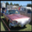
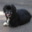
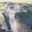
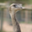
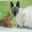
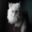

In [4]:
test_data['image'].explore()

In [14]:
raw_pixel_model=tc.logistic_classifier.create(train_data,target='label',features=['image_array'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 3072

Number of coefficients      : 9219

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 5        | 0.022799  | 0.579109     | 0.305147          | 0.178218            |

| 1         | 10       | 1.937884  | 1.264705     | 0.389706          | 0.297030            |

| 2         | 11       | 1.937884  | 1.510063     | 0.415966          | 0.316832            |

| 3         | 16       | 1.256696  | 2.142079     | 0.433298          | 0.366337            |

| 4         | 17       | 1.256696  | 2.369241     | 0.448004          | 0.346535            |

| 9         | 23       | 1.256696  | 3.773085     | 0.519433          | 0.465347            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [7]:
raw_pixel_model.predict(test_data[0:6])

dtype: str
Rows: 6
['bird', 'cat', 'bird', 'automobile', 'cat', 'dog']

In [8]:
test_data[0:6]['label']

dtype: str
Rows: 6
['cat', 'automobile', 'cat', 'automobile', 'dog', 'dog']

In [9]:
raw_pixel_model.evaluate(test_data)

{'accuracy': 0.48075,
 'auc': 0.7239109999999995,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |  148  |
 |  automobile  |       cat       |  133  |
 |     cat      |       bird      |  187  |
 |     dog      |       bird      |  221  |
 |     cat      |    automobile   |  207  |
 |     cat      |       cat       |  327  |
 |     dog      |       dog       |  405  |
 |     cat      |       dog       |  279  |
 |     bird     |       cat       |  159  |
 |  automobile  |       bird      |   91  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.47383097346226044,
 'log_loss': 1.2090973598612538,
 'precisi

In [13]:
deep_features_model=tc.logistic_classifier.create(train_data,target='label',features=['deep_features'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 1904

Number of classes           : 4

Number of feature columns   : 1

Number of unpacked features : 4096

Number of coefficients      : 12291

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 3        | 0.500000  | 0.584290     | 0.744748          | 0.683168            |

| 1         | 6        | 0.250000  | 1.308532     | 0.761029          | 0.782178            |

| 2         | 13       | 3.304431  | 2.758899     | 0.785189          | 0.782178            |

| 3         | 15       | 3.204583  | 3.319776     | 0.162290          | 0.178218            |

| 4         | 17       | 1.083877  | 3.880796     | 0.738445          | 0.702970            |

| 9         | 25       | 1.000000  | 6.593411     | 0.940651          | 0.762376            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [15]:
deep_features_model.predict(test_data[0:6])

dtype: str
Rows: 6
['cat', 'automobile', 'cat', 'automobile', 'dog', 'dog']

In [16]:
test_data[0:6]['label']

dtype: str
Rows: 6
['cat', 'automobile', 'cat', 'automobile', 'dog', 'dog']

In [17]:
deep_features_model.evaluate(test_data)

{'accuracy': 0.79475,
 'auc': 0.9406532916666656,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 16
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |     dog      |    automobile   |   10  |
 |     bird     |       bird      |  806  |
 |  automobile  |       bird      |   15  |
 |     dog      |       bird      |   58  |
 |     cat      |    automobile   |   25  |
 |     cat      |       cat       |  676  |
 |     bird     |       cat       |  129  |
 |     cat      |       dog       |  225  |
 |     dog      |       dog       |  735  |
 |     bird     |       dog       |   52  |
 +--------------+-----------------+-------+
 [16 rows x 3 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.,
 'f1_score': 0.7951453662599046,
 'log_loss': 0.6355537010200156,
 'precisio

In [ ]:
v